#K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1.  Question


### a) Specifying the Data Analytic Question

### b)  Metrics of Success

* Sucessful Exploratory Data Analysis.
* Sucessful feature engineering.
* Sucessful check for multicollinearity.
* Sucessful generation of a K-Nearest Neighbours (KNN) Classifier model .
* Sucessful optimization of model parameters.
* Sucessful Computation of accuracy score on all models.
* Sucessful selection of the prefered model.
### c) Understanding the context 

### d) Experimental Design
* Formulation of the research question.
* Loading the data.
* Exploratory Data Analysis.
* feature engineering.
* Multicollinearity check.
* KNN model generation.
* Model Parameter optimization and plots.
* Challenging the solution.
* Follow up .
### e) Data Relevance



#2. Importing required libraries

In [507]:
%matplotlib inline
import sklearn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 3. Reading the Data

In [508]:
# Loading the Data from the source i.e. csv

Test_Dataset= pd.read_csv('Test_Dataset.csv')
Training_Dataset= pd.read_csv('Training_Dataset.csv')


## 4. Checking the Data

Determining the no. of records in our dataset

In [509]:
print('Training_Dataset:',Training_Dataset.shape)
print('\n','Test_Dataset:',Test_Dataset.shape)


Training_Dataset: (891, 12)

 Test_Dataset: (418, 11)


Previewing the top of our dataset


In [510]:
Training_Dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [511]:
Test_Dataset.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


Previewing the bottom of our dataset

In [513]:
Training_Dataset.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [514]:
Test_Dataset.tail(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Drop unnecssary columns

In [515]:
#Training_Dataset
Training_Dataset= Training_Dataset.drop(['PassengerId','Name', 'Ticket','Cabin'],1)

Training_Dataset.sample(1)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
62,0,1,male,45.0,1,0,83.475,S


In [516]:
#Test_Dataset
Test_Dataset= Test_Dataset.drop(['PassengerId','Name', 'Ticket','Cabin'],1)
Test_Dataset.sample(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
303,3,male,24.0,0,0,8.6625,S


Checking whether each column has an appropriate datatype

In [517]:
Training_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [518]:
Test_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


checcking the numerical and categorical variables

In [519]:
numerical =Training_Dataset._get_numeric_data().columns
categorical = set(Training_Dataset.columns) - set(numerical)
numerical

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## 5. External Data Source Validation

## 6. Tidying the Dataset

Checking for Outliers

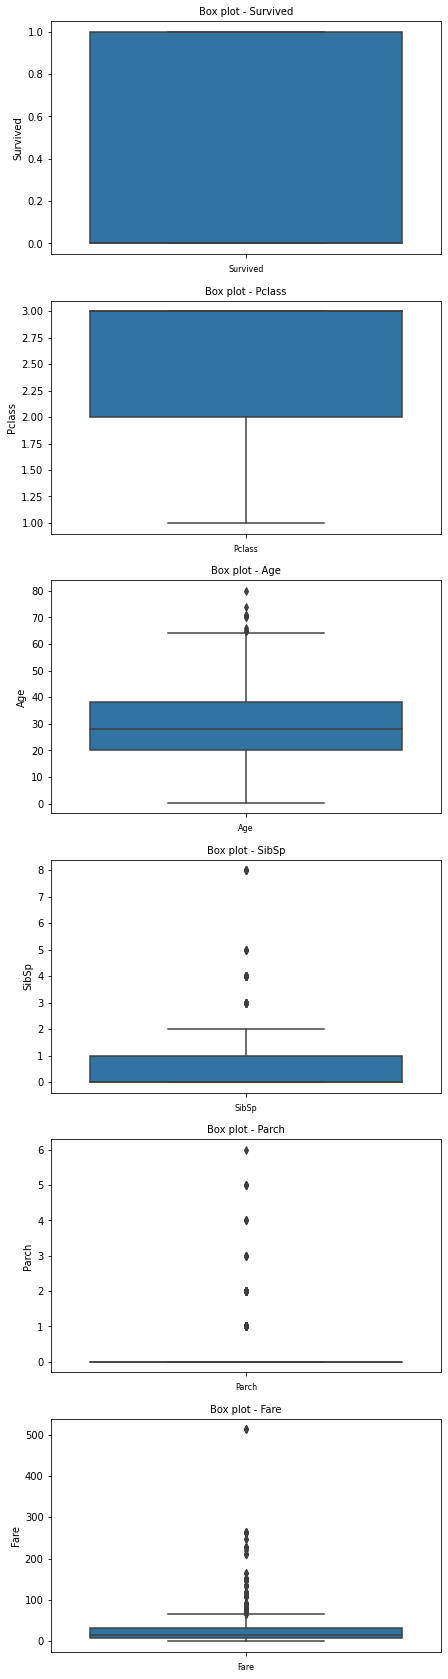

In [520]:
col_names= numerical

fig, ax = plt.subplots(len(col_names), figsize=(7,30))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Training_Dataset[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Percentile Outlier Visualization 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

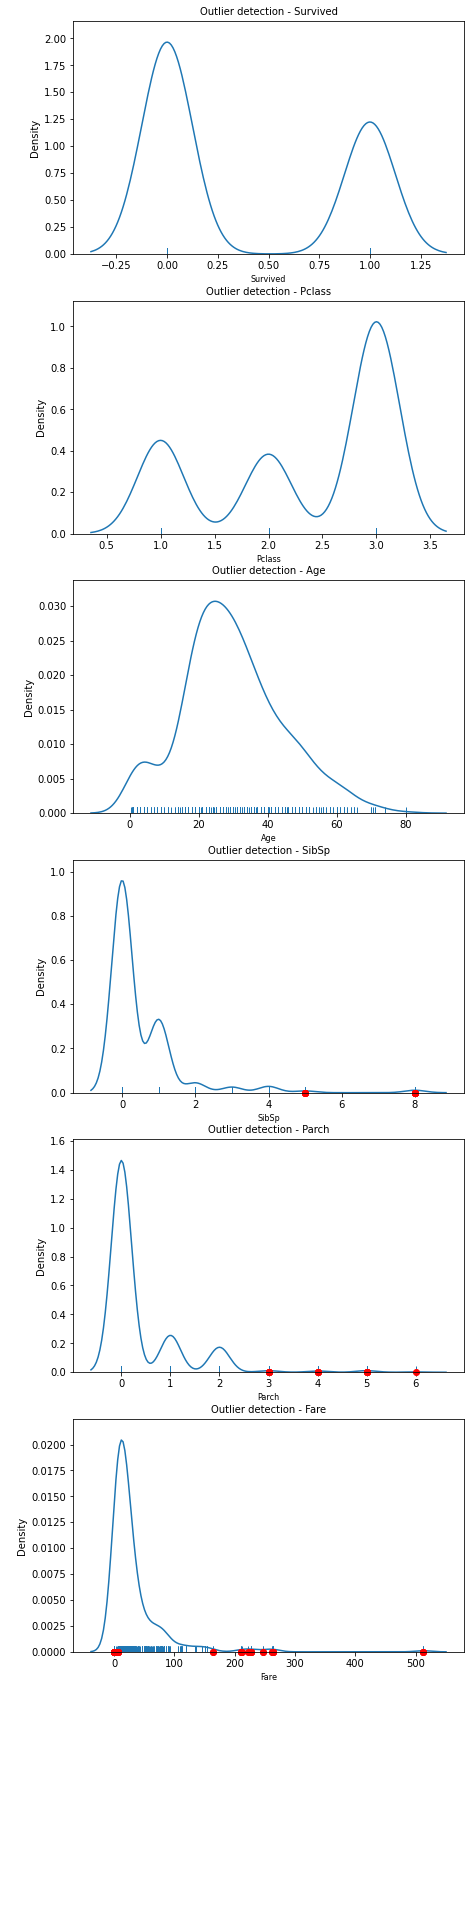

In [521]:
#Values marked with a red dot below in the x-axis of the graph are the ones to be removed
#from the column based on the set threshold percentile (95 in our case), and
#is also the default value when it comes to percentile-based outlier removal.

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names= numerical

fig, ax = plt.subplots(len(col_names), figsize=(7,30))

for i, col_val in enumerate(col_names):
    x = Training_Dataset[col_val]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Checking for Anomalies

In [439]:
# Checking for Anomalies


Identifying the Missing Data

In [522]:
Training_Dataset.isnull().values.any()
Training_Dataset.isnull().sum().sum()

179

 Dealing with the Missing Data

In [523]:
#The frequency of Missings
Training_Dataset.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [524]:
Test_Dataset.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Replace missing age values with the mean

In [525]:
Training_Dataset["Age"] = Training_Dataset["Age"].fillna(value=Training_Dataset["Age"].median())
Test_Dataset["Age"] = Test_Dataset["Age"].fillna(value=Test_Dataset["Age"].median())


Drop Rows with NaN Values on the Embarked, fare and survive column.

In [526]:
Training_Dataset.dropna(subset = ["Embarked"], inplace=True)
Training_Dataset.dropna(subset = ["Survived"], inplace=True)
Test_Dataset.dropna(subset = ["Fare"], inplace=True)

## 7. Exploratory Analysis

##      Univariate analysis

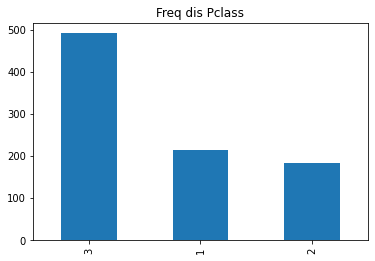

In [527]:
Training_Dataset['Pclass'].value_counts().plot.bar(title='Freq dis Pclass')

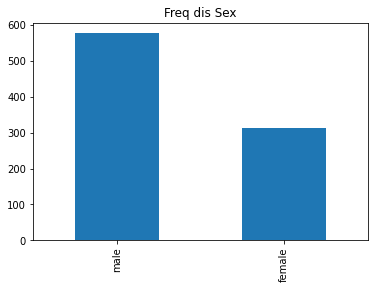

In [528]:
Training_Dataset['Sex'].value_counts().plot.bar(title='Freq dis Sex')

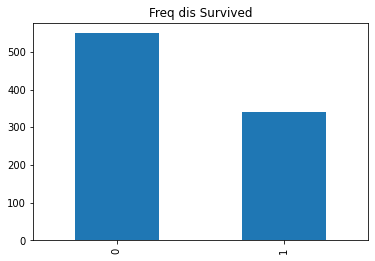

In [529]:
Training_Dataset['Survived'].value_counts().plot.bar(title='Freq dis Survived')

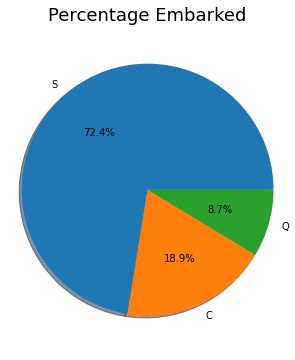

In [530]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
plt.pie(Training_Dataset['Embarked'].value_counts(),labels=['S','C','Q'], autopct='%1.1f%%',shadow=True, startangle=0)
plt.axis('equal')
plt.title('Percentage Embarked', size=18)
plt.show()

## BIVARIATE ANALYSIS

Pclass by Sex

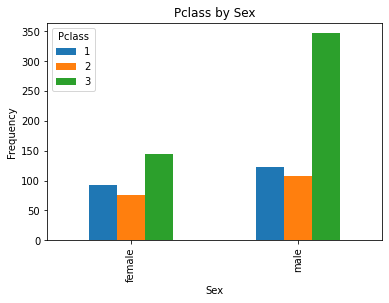

In [531]:

pd.crosstab(Training_Dataset.Sex,Training_Dataset.Pclass).plot(kind='bar')
plt.title('Pclass by Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

Embarked by Sex

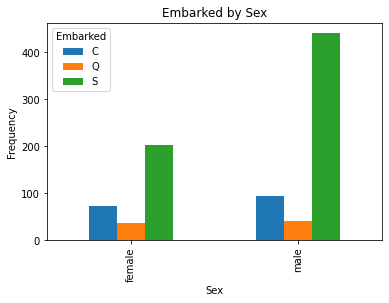

In [532]:
pd.crosstab(Training_Dataset.Sex,Training_Dataset.Embarked).plot(kind='bar')
plt.title('Embarked by Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

# Encode the data

Training_Dataset

In [533]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer

df_col=['Embarked','Sex']

for i in range(len(df_col)):
    Training_Dataset[df_col[i]] = LabelEncoder().fit_transform(Training_Dataset[df_col[i]])

Training_Dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


Test_Dataset

In [534]:
df_col=['Embarked','Sex']

for i in range(len(df_col)):
    Test_Dataset[df_col[i]] = LabelEncoder().fit_transform(Test_Dataset[df_col[i]])

Test_Dataset.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2


## 7. Implementing the Solution

#A: Classification (split:80-20)

In [535]:
# Implementing the Solution
#
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
# ---
#x = Training_Dataset.drop('Survived',1)
#y = Training_Dataset['Survived']
# 
X = Training_Dataset.iloc[:, :-1].values
y = Training_Dataset.iloc[:,7].values

In [536]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [537]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [538]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [539]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [540]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# from sklearn.metrics import classification_report, confusion_matrix
#print('\n','*'*100)
#print(classification_report(y_test, y_pred))
#print('\n','*'*100)


from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

print('\n',"*"*100)
print("Computed Model Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')
print('\n',"*"*100)


 ****************************************************************************************************
Computed Model Accuracy: 72.47191011235955 %

 ****************************************************************************************************


In [541]:
print(confusion_matrix(y_test, y_pred))

[[  9   0  21]
 [  0   6   6]
 [  9  13 114]]


#B: Classification (split:70-30)

In [542]:
# Then loading our libraries
# 
from sklearn.neighbors import KNeighborsRegressor


In [543]:
# Splitting our data
# ---

Xb= Training_Dataset.drop('Survived',1)
yb = Training_Dataset['Survived']
X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.3, random_state=0)

In [545]:
# Training our algorithm

clfb= KNeighborsClassifier(n_neighbors=5)
clfb.fit(X_trainb, y_trainb)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [546]:
# Making our prediction

y_predb = clfb.predict(X_testb)


In [547]:
print('\n',"*"*100)
print("Computed Model Accuracy:",metrics.accuracy_score(y_testb, y_predb)*100,'%')
print('\n',"*"*100)


 ****************************************************************************************************
Computed Model Accuracy: 71.16104868913857 %

 ****************************************************************************************************


In [548]:
print(confusion_matrix(y_testb, y_predb))

[[120  37]
 [ 40  70]]


C: Classification (split:60-40)

In [549]:
# Splitting our data
# ---

Xc= Training_Dataset.drop('Survived',1)
yc = Training_Dataset['Survived']
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size=0.4, random_state=0)

In [550]:
# Training our algorithm
# ---
# 
clfc= KNeighborsClassifier(n_neighbors=5)
clfc.fit(X_trainc, y_trainc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [551]:
# Making our prediction

y_predc = clfc.predict(X_testc)


In [552]:
print('\n',"*"*100)
print("Computed Model Accuracy:",metrics.accuracy_score(y_testc, y_predc)*100,'%')
print('\n',"*"*100)


 ****************************************************************************************************
Computed Model Accuracy: 71.62921348314607 %

 ****************************************************************************************************


 Outcomes of the various classifications

In [553]:
print('\n',"*"*100)
print('\n',"Model Accuracy for  (80-20)split::",metrics.accuracy_score(y_test, y_pred)*100,'%')
print('\n',"Model Accuracy for  (70-30)split::",metrics.accuracy_score(y_testb, y_predb)*100,'%')
print('\n',"Model Accuracy for  (60-40)split::",metrics.accuracy_score(y_testc, y_predc)*100,'%')
print('\n',"*"*100)


 ****************************************************************************************************

 Model Accuracy for  (80-20)split:: 72.47191011235955 %

 Model Accuracy for  (70-30)split:: 71.16104868913857 %

 Model Accuracy for  (60-40)split:: 71.62921348314607 %

 ****************************************************************************************************


Notably a lager training dataset grantees  better model performance.

## **Tuning and Optimizing kNN**

#(a). Appropriate nearest-neighbour technique

In [478]:
#first fit a decision tree with default parameters to get a baseline idea of the performance

X = Training_Dataset.drop('Survived',1)  # n features
y = Training_Dataset['Survived']    # 1 feature

#Splitting data into Train data and Test data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3,random_state = 100)

from sklearn.neighbors import KNeighborsClassifier
# instantiate learning model with k=3
knn = KNeighborsClassifier(n_neighbors = 3)
# fitting model
knn.fit(X_train,y_train)
#predict
y_ = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy before optimization:{}".format(accuracy_score(y_test,y_pred)*100))



Accuracy before optimization:71.91011235955057


Finding the optimum value for K (Parameter Tuning)

We’ll use 10-fold cross-validation on our dataset using a generated list of odd K’s ranging from 1–50.

In [479]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Creating odd list K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring =
    "accuracy")
    cv_scores.append(scores.mean())



#Now you can get the optimal value of K by either of the two methods.

#(a) i). Calculating the misclassification error

In [480]:
# Changing to mis classification error
mse = [1-x for x in cv_scores]
# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))


The optimal no. of neighbors is 9


#(a)ii). Plotting the accuracy score for different values of K.

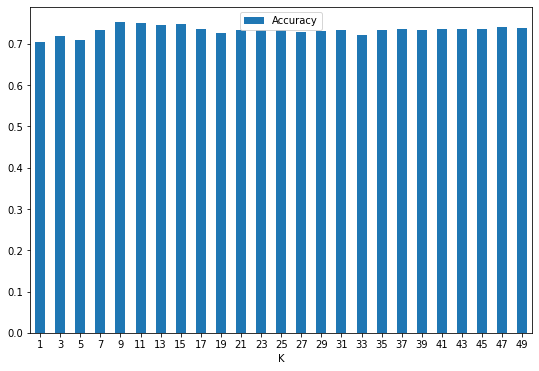

In [505]:
import matplotlib.pyplot as plt
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,50,2)], "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6),rot=0)
    plt.show()
plot_accuracy(cv_scores)

Using n neighbors=1 means each sample is using itself as reference, that’s an overfitting case. For our data, increasing the number of neighbors improves the test scores

#(b) . P in L_p distance

This is the power parameter for the Minkowski metric. When p=1, this is equivalent to using manhattan_distance(l1), and euliddean_distance(l2) for p=2. For arbitrary p, minkowski distance (l_p) is used


We will use **AUC (Area Under Curve)** as the evaluation metric. Our target value is binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems

In [490]:
#We first Creat a baseline model
train= Training_Dataset.drop('Survived',1)
labels= Training_Dataset['Survived']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

print(model)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [492]:
#Compute Area Under Curve)
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Area Under Curve:',roc_auc)

Area Under Curve: 0.666829586184425


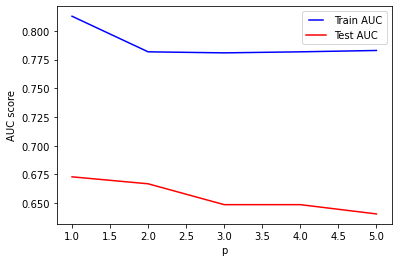

In [498]:
distances = [1, 2, 3, 4, 5]
train_results = []
test_results = []
for p in distances:
   model = KNeighborsClassifier(p=p)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(distances, train_results, 'b', label='Train AUC')
line2, = plt.plot(distances, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('p')
plt.show()

In most cases, the choice is always between l1 and l2 but it’s interesting to see the results of higher minkowski distances. For our data, using l1 seems to be better than l2 and other l_p distances.

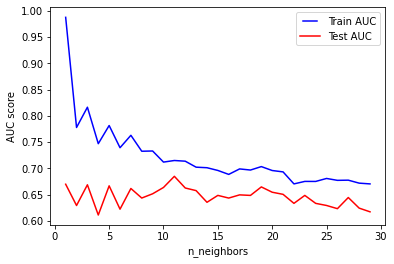

The optimal no. of neighbors is 11 as per Area Under Curve


In [503]:
neighbors = list(range(1,30,1))
train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

optima_k_value = neighbors[test_results.index(max(test_results))]
print("The optimal no. of neighbors is {} as per Area Under Curve".format(optima_k_value))

##OPTIMIZED TEST DATA PREDICTION

In [555]:
#We first Creat a baseline model
train= Training_Dataset.drop('Survived',1)
labels= Training_Dataset['Survived']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 11)

print(model)
model.fit(x_train, y_train)

y_pred = model.predict(Test_Dataset)
y_pred

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

## 8. Challenging the solution

The models performance can be improved through other advanced machine learning techniques.


## 9. Follow up questions

### a). Did we have the right data?
*  yes


### b). Do we need other data to answer our question?

* Probally yes because theremight be other factors influencethe outcome.

### c). Did we have the right question?

* Open for further research.